In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jupyter_contrib_nbextensions

In [11]:
f1, A1 = 1, 4
f2, A2 = 3, 3
f3, A3 = 4, 1
fs = 10 * np.max(np.array([f1, f2, f3]))
ts = 1 / fs
min_time = 0
max_time = 10

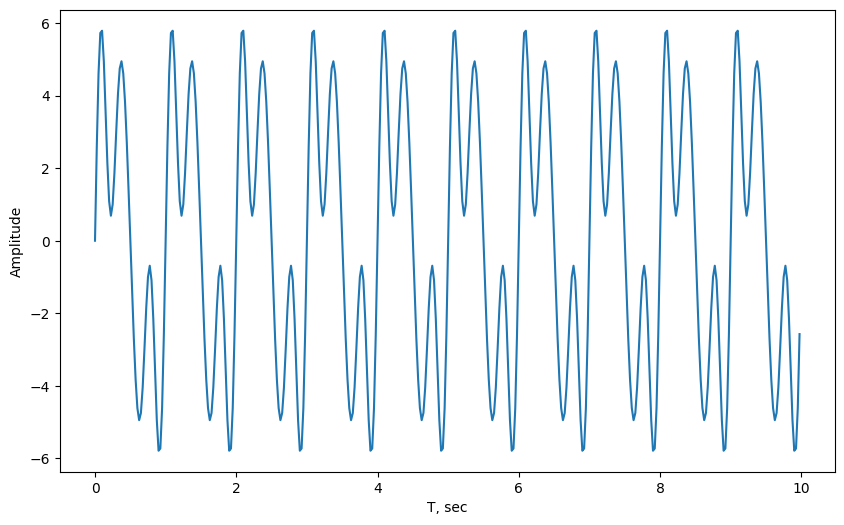

In [12]:
fig = plt.figure(figsize=(10, 6))
t = np.arange(min_time, max_time, ts)
N = int(np.fix(max_time * fs))
f = np.arange(len(t)) * fs / N
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t) + A3 * np.sin(2 * np.pi * f3 * t)


plt.plot(t, x)
plt.xlabel('T, sec')
plt.ylabel('Amplitude')
plt.show()

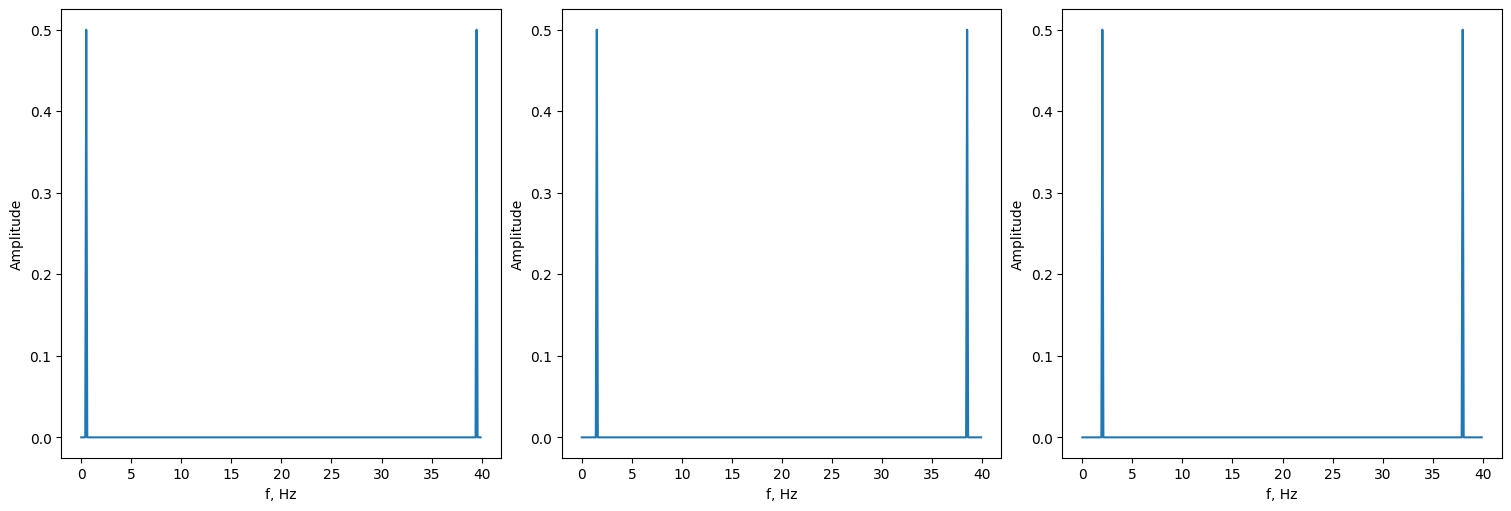

In [13]:
fig, _ = plt.subplots(1, 3, constrained_layout = True)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.subplot(131)
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(np.sin(np.pi * f1 * t))) / len(t))

plt.subplot(132)
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(np.sin(np.pi * f2 * t))) / len(t))

plt.subplot(133)
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(np.sin(np.pi * f3 * t))) / len(t))
plt.show()

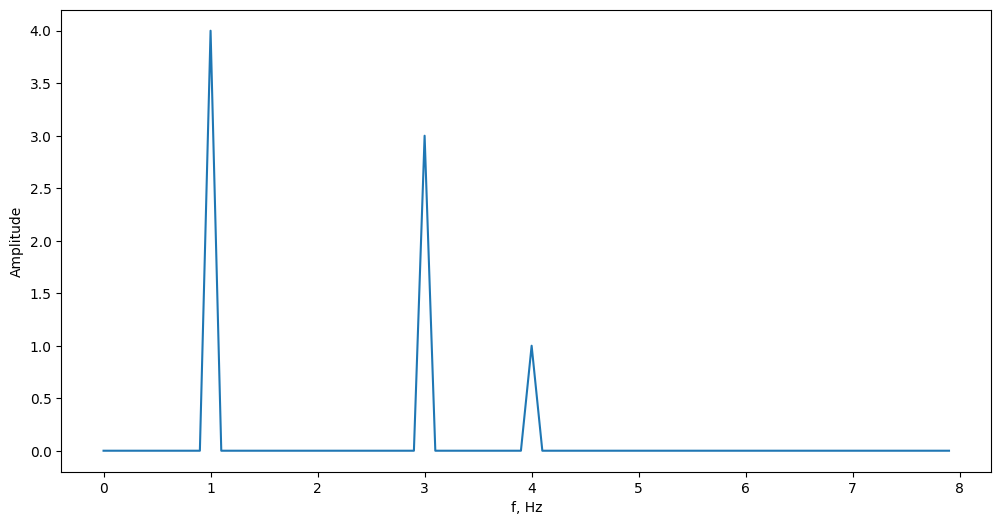

In [14]:
fig = plt.figure(figsize=(12, 6))
t = np.arange(min_time, max_time, ts)
N = int(np.fix(max_time * fs))
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t) + A3 * np.sin(2  *np.pi * f3 * t)
spectrum = np.abs(2 * np.fft.fft(x) / len(t))
f = np.arange(len(t)) * fs / N

plt.plot(f[:len(t)//5], spectrum[:len(t)//5])
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.show()

In [15]:
def Butter_Low_Pass2(w, wc):
    H = wc ** 2 / (- w ** 2 + 1j * np.sqrt(2) * wc * w + wc ** 2)
    return H


def BLPF2(f: np.array, fc):
    for i in range(len(f)):
        f[i] = Butter_Low_Pass2(2 * np.pi * f[i], 2 * np.pi * fc)
    return f

# Фильтр нижних частот

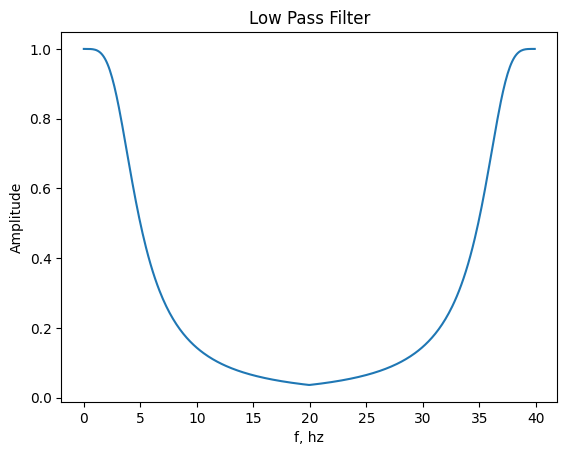

In [55]:
LP_Filter = BLPF2(f.astype(complex), 3.8)
LP_Filter = np.concatenate((LP_Filter[:len(LP_Filter)//2], np.flip(LP_Filter[:len(LP_Filter)//2])))
plt.title('Low Pass Filter')
plt.plot(f, np.abs(LP_Filter))
plt.xlabel('f, hz')
plt.ylabel('Amplitude')
plt.show()

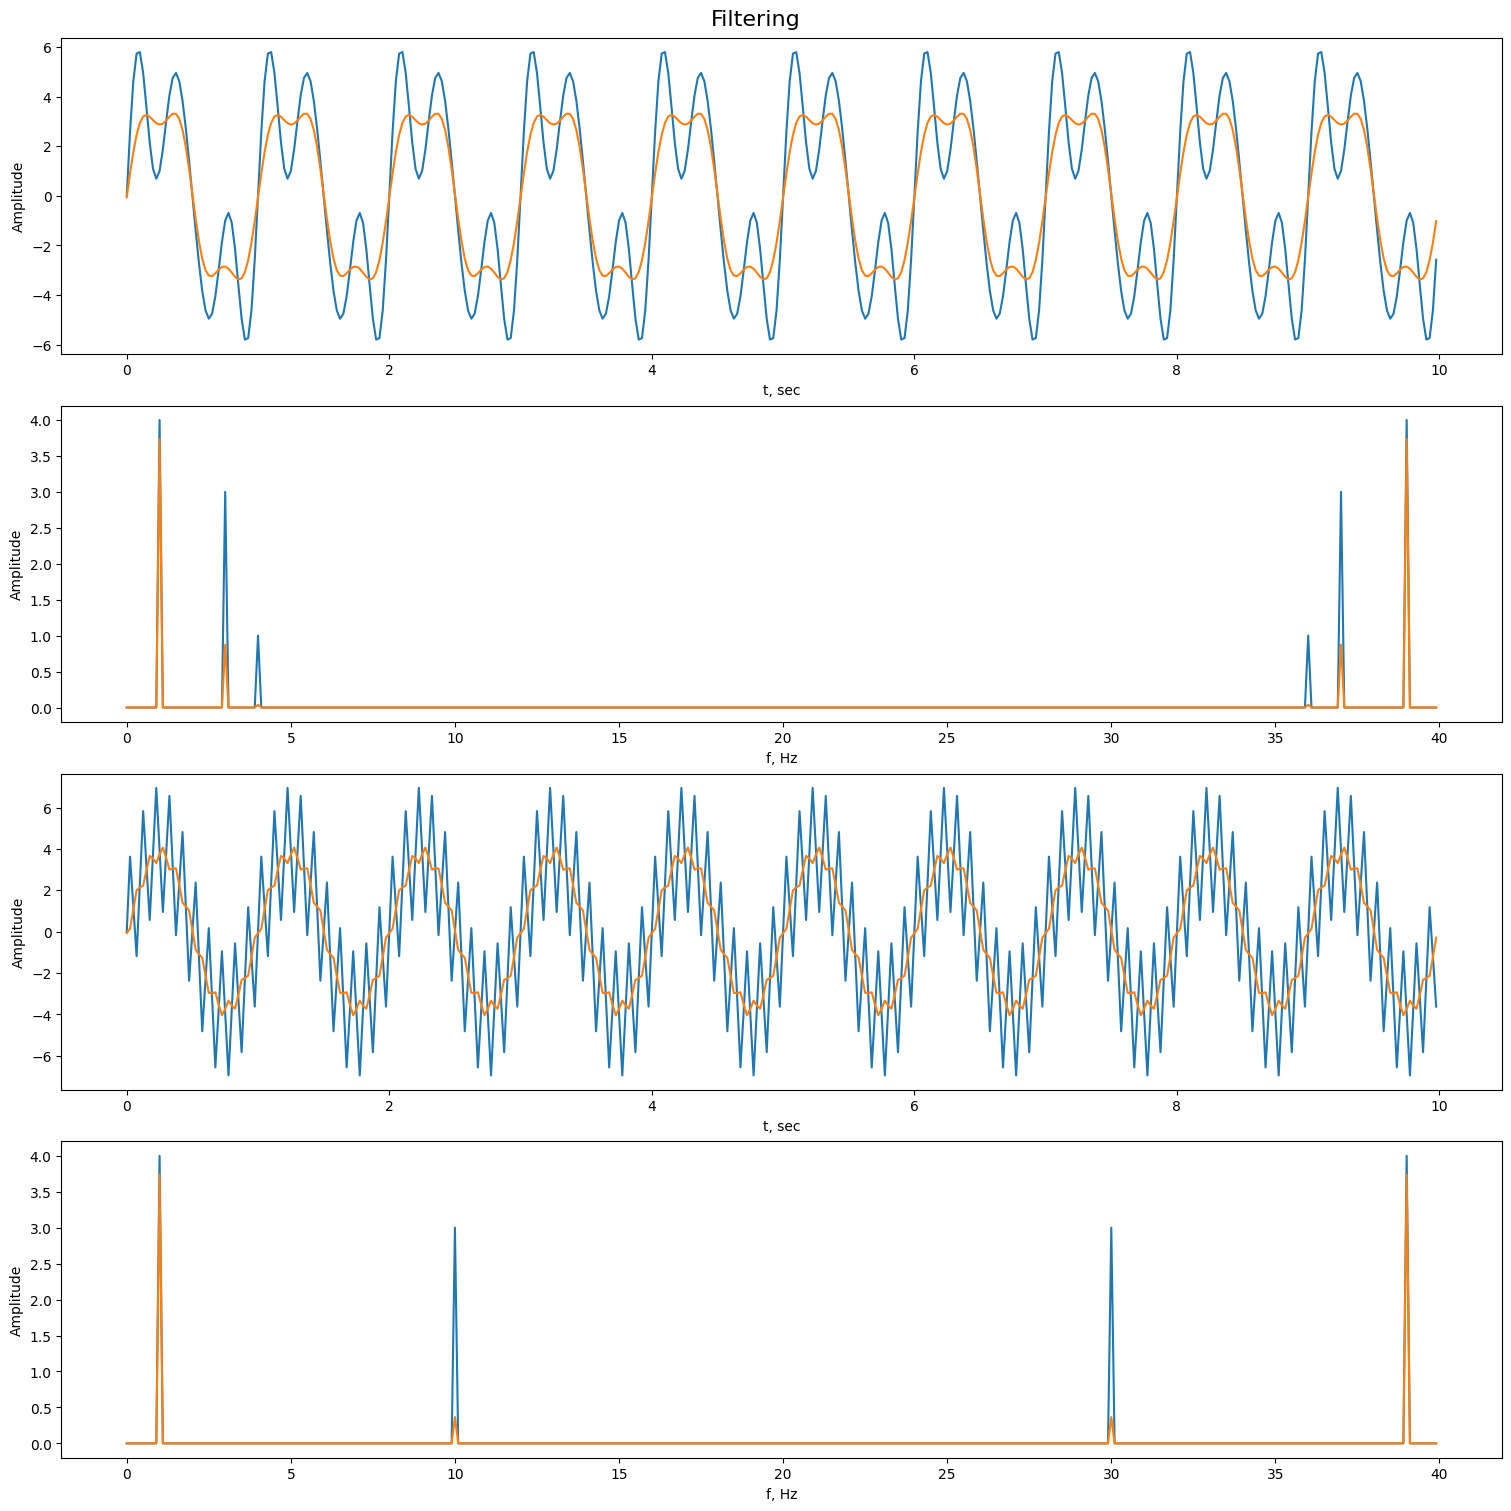

In [56]:
sin2 = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * 10 * f1 * t)

fs3 = np.real(np.fft.ifft(LP_Filter * np.fft.fft(x)))
fs2 = np.real(np.fft.ifft(LP_Filter * np.fft.fft(sin2)))

fig, axs = plt.subplots(4, constrained_layout = True)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, x)
axs[0].plot(t, fs3)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(x) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs3) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
axs[2].plot(t, sin2)
axs[2].plot(t, fs2)
axs[2].set(xlabel='t, sec', ylabel='Amplitude')
axs[3].plot(f, np.abs(2 * np.fft.fft(sin2) / len(t)))
axs[3].plot(f, np.abs(2 * np.fft.fft(fs2) / len(t)))
axs[3].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()

# Фильтр высоких частот

In [18]:
def Butter_High_Pass2(w, wc):
    H = w ** 2 / (- wc ** 2 + 1j * np.sqrt(2) * wc * w + w ** 2)
    return H


def BHPF2(f: np.array, fc):
    for i in range(len(f)):
        f[i] = Butter_High_Pass2(2 * np.pi * f[i], 2 * np.pi * fc)
    return f

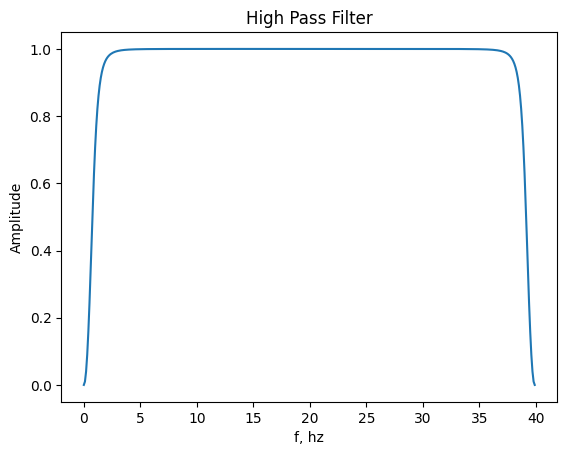

In [19]:
HP_Filter = BHPF2(f.astype(complex), 1)
HP_Filter = np.concatenate((HP_Filter[:len(HP_Filter)//2], np.flip(HP_Filter[:len(HP_Filter)//2])))
plt.title('High Pass Filter')
plt.plot(f, np.abs(HP_Filter))
plt.xlabel('f, hz')
plt.ylabel('Amplitude')
plt.show()

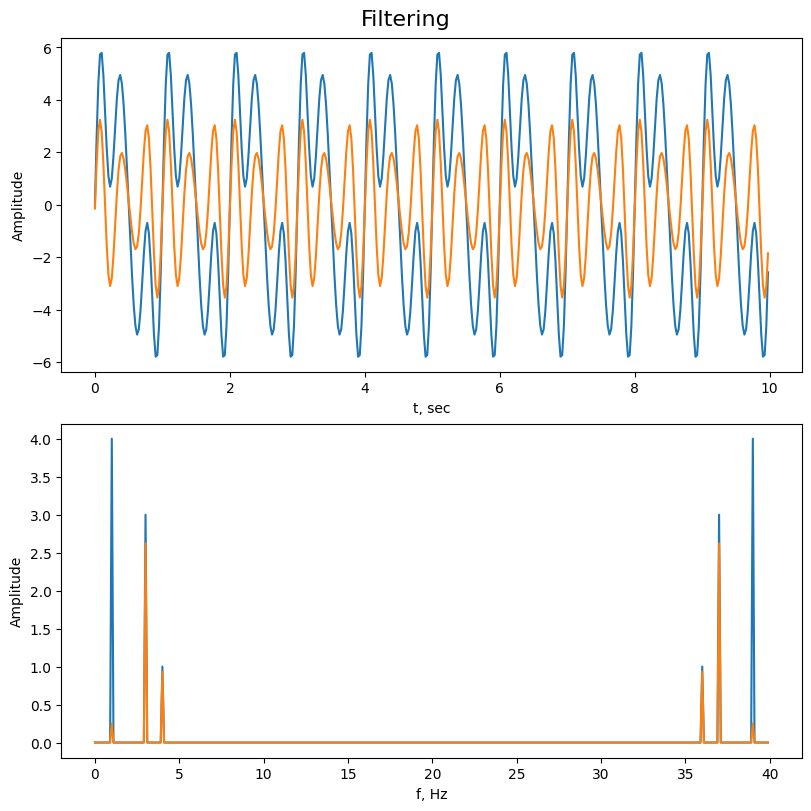

In [20]:
fs3 = np.real(np.fft.ifft(HP_Filter * np.fft.fft(x)))

fig, axs = plt.subplots(2, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, x)
axs[0].plot(t, fs3)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(x) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs3) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()

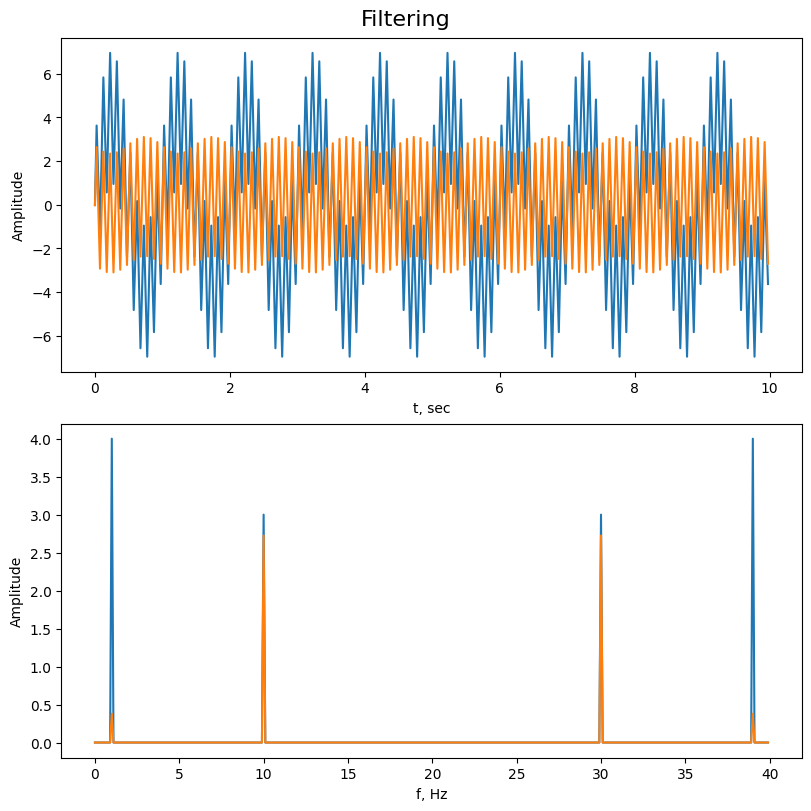

In [54]:
HP_Filter = BHPF2(f.astype(complex), 2.9)
HP_Filter = np.concatenate((HP_Filter[:len(HP_Filter)//2], np.flip(HP_Filter[:len(HP_Filter)//2])))

sin2 = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * 10 * f1 * t)
fs2 = np.real(np.fft.ifft(HP_Filter * np.fft.fft(sin2)))

fig, axs = plt.subplots(2, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, sin2)
axs[0].plot(t, fs2)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(sin2) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs2) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()

In [22]:
def BandPass_Filter2(w, wc1, wc2):
    return Butter_High_Pass2(w, wc1) * Butter_Low_Pass2(w, wc2)


def BPF2(f: np.array, fc1, fc2):
    for i in range(len(f)):
        f[i] = BandPass_Filter2(2 * np.pi * f[i], 2 * np.pi * fc1, 2 * np.pi * fc2)
    return f

# Полосовой фильтр

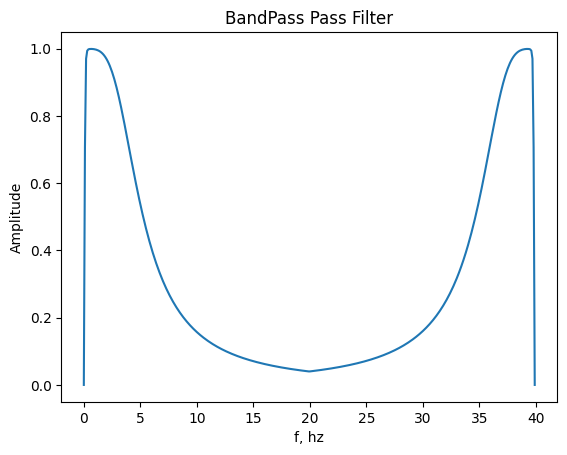

In [48]:
BP_Filter = BPF2(f.astype(complex), 0.1, 3.99)
BP_Filter = np.concatenate((BP_Filter[:len(BP_Filter)//2], np.flip(BP_Filter[:len(BP_Filter)//2])))
plt.title('BandPass Pass Filter')
plt.plot(f, np.abs(BP_Filter))
plt.xlabel('f, hz')
plt.ylabel('Amplitude')
plt.show()

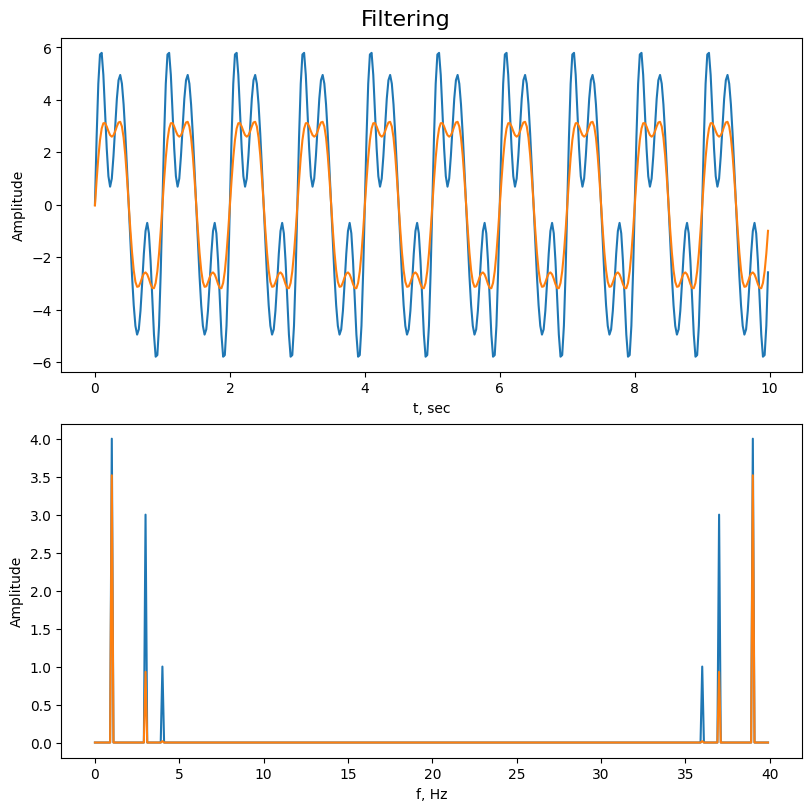

In [49]:
fs3 = np.real(np.fft.ifft(BP_Filter * np.fft.fft(x)))

fig, axs = plt.subplots(2, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, x)
axs[0].plot(t, fs3)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(x) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs3) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()

# Заграждающий фильтр

In [25]:
def Rejector_Filter2(w, wc1, wc2):
    return Butter_High_Pass2(w, wc1) + Butter_Low_Pass2(w, wc2)


def RF2(f: np.array, fc1, fc2):
    for i in range(len(f)):
        f[i] = Rejector_Filter2(2 * np.pi * f[i], 2 * np.pi * fc1, 2 * np.pi * fc2)
    return f

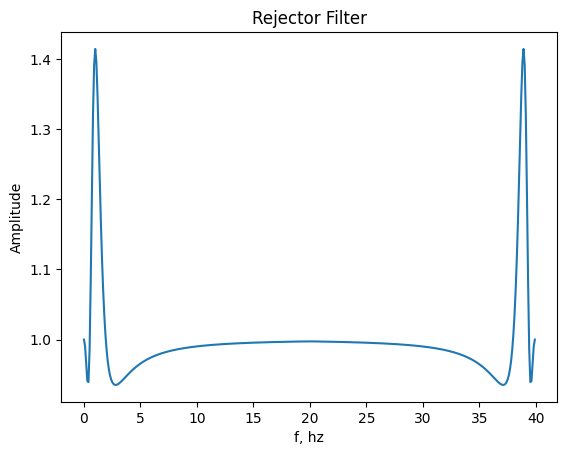

In [38]:
RP_Filter = RF2(f.astype(complex), 1, 1)
RP_Filter = np.concatenate((RP_Filter[:len(RP_Filter)//2], np.flip(RP_Filter[:len(RP_Filter)//2])))
plt.title('Rejector Filter')
plt.plot(f, np.abs(RP_Filter))
plt.xlabel('f, hz')
plt.ylabel('Amplitude')
plt.show()

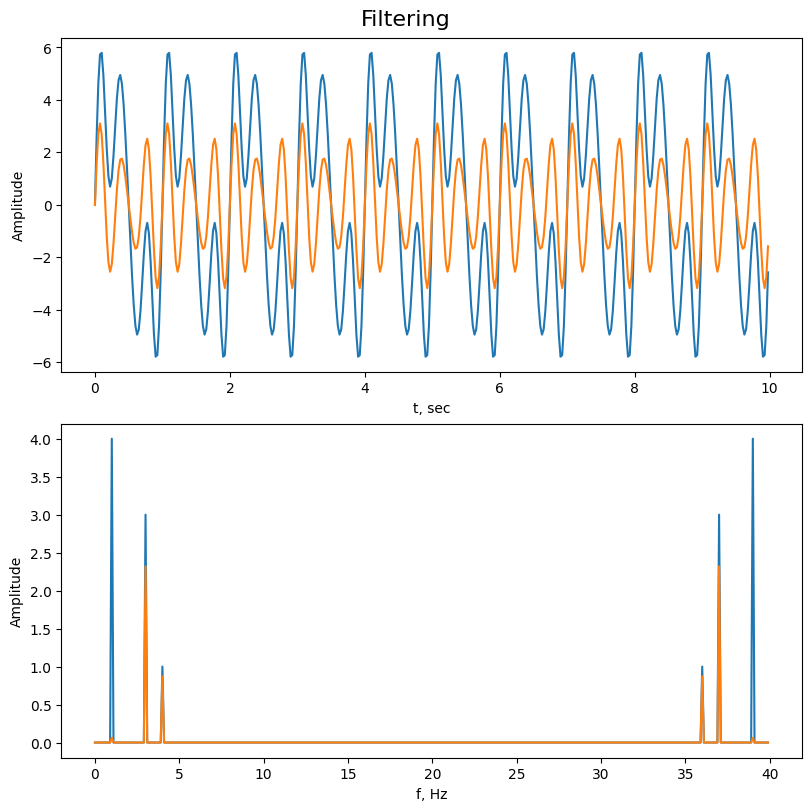

In [39]:
fs3 = np.real(np.fft.ifft(RP_Filter * np.fft.fft(x)))

fig, axs = plt.subplots(2, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, x)
axs[0].plot(t, fs3)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(x) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs3) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()

# Фильтр любого порядка

Реализуем функцию, вычисляющую нормированные многочлены Баттерворта. https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%91%D0%B0%D1%82%D1%82%D0%B5%D1%80%D0%B2%D0%BE%D1%80%D1%82%D0%B0

In [28]:
def H(f, n):
    H = 1
    if n % 2 == 1:
        H = H / (1j * (f) + 1)
        r = (n - 1) // 2
    else:
        r = n // 2
    for k in range(r):
        B_k = - f ** 2 - 2j * f * np.cos(np.pi * (2*k + r - 1) / (2 * r)) + 1
        H = H / B_k
    return H


def BLPF(f, cutoff, order):
    half = H(f[:f.size // 2] / cutoff, order)
    return np.concatenate((half, np.flip(half)))

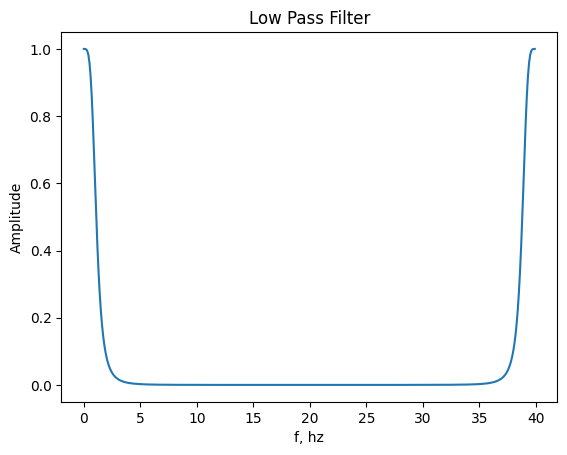

In [29]:
BLP_Filter = BLPF(f.astype(complex), 1.1, 4)
plt.title('Low Pass Filter')
plt.plot(f, np.abs(BLP_Filter))
plt.xlabel('f, hz')
plt.ylabel('Amplitude')
plt.show()

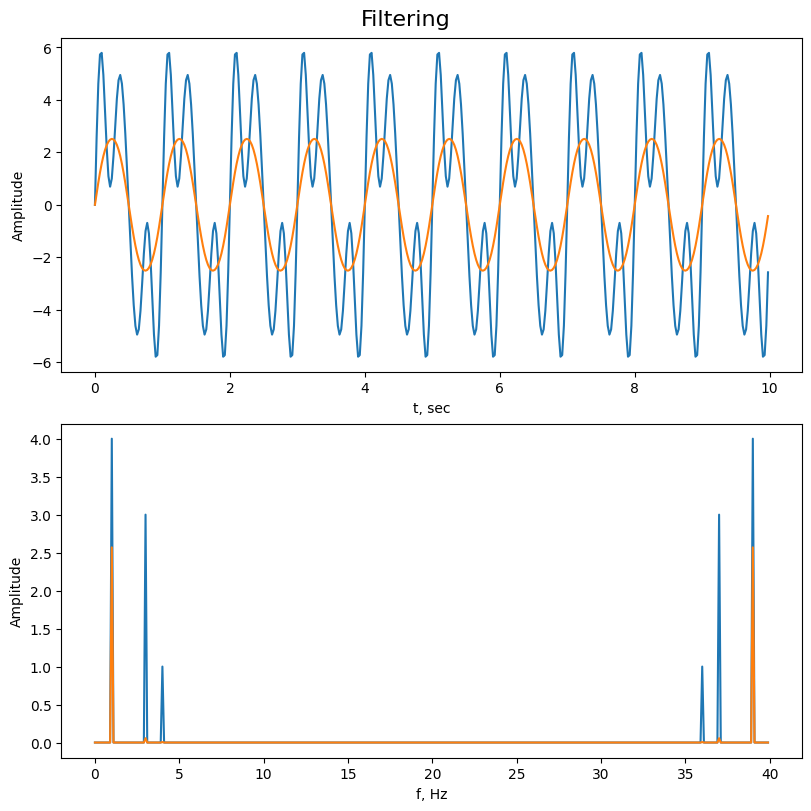

In [30]:
fs3 = np.real(np.fft.ifft(BLP_Filter * np.fft.fft(x)))

fig, axs = plt.subplots(2, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, x)
axs[0].plot(t, fs3)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(x) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs3) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()

# Добавим шум

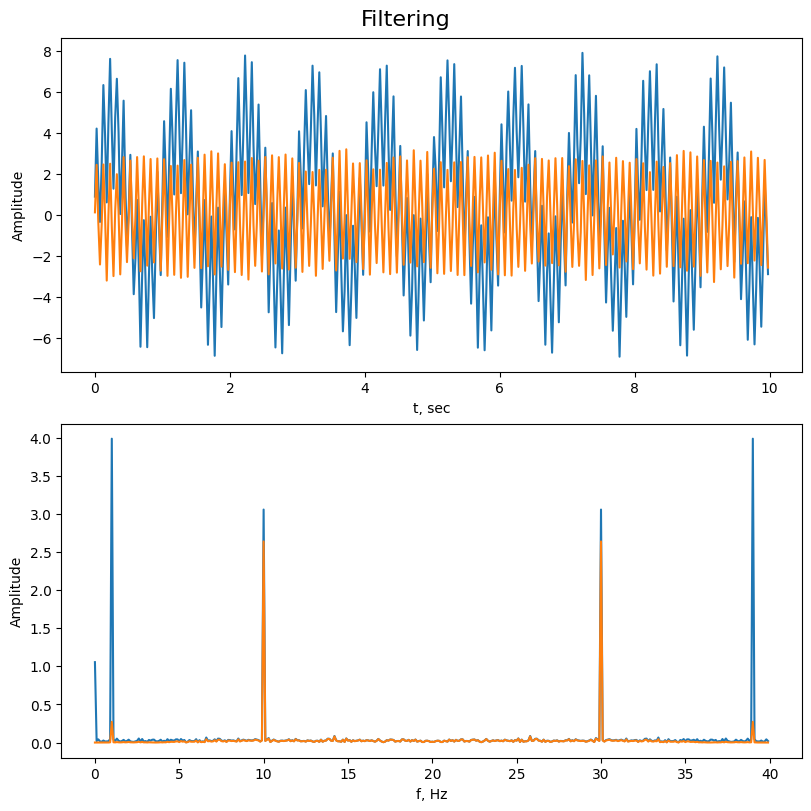

In [34]:
BLP_Filter = BLPF(f.astype(complex), 1.01, 4)
BLP_Filter = np.concatenate((BLP_Filter[:len(BLP_Filter)//2], np.flip(BLP_Filter[:len(BLP_Filter)//2])))
sin2 = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * 10 * f1 * t)
noise = np.random.sample(len(sin2))
noised_signal = sin2 + noise
fs2 = np.real(np.fft.ifft(HP_Filter * np.fft.fft(noised_signal)))

fig, axs = plt.subplots(2, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, noised_signal)
axs[0].plot(t, fs2)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(noised_signal) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs2) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()

# Уберем пик в начале спектра зашумленного сигнала

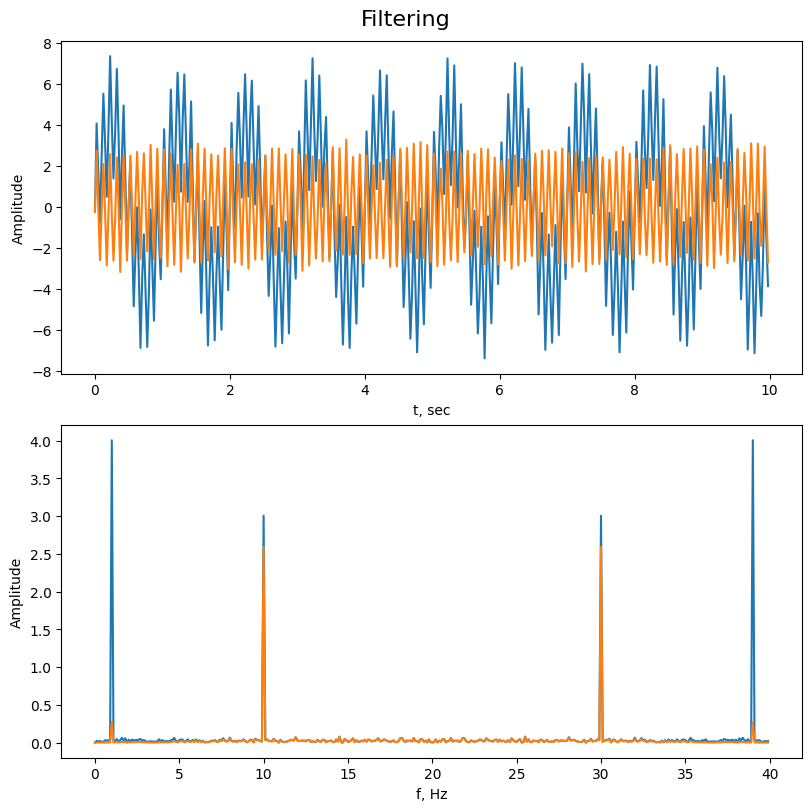

In [35]:
BLP_Filter = BLPF(f.astype(complex), 1.2, 4)
BLP_Filter = np.concatenate((BLP_Filter[:len(BLP_Filter)//2], np.flip(BLP_Filter[:len(BLP_Filter)//2])))
sin2 = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * 10 * f1 * t)
noise = np.random.sample(len(sin2))
noised_signal = sin2 + noise - np.mean(sin2 + noise)
fs2 = np.real(np.fft.ifft(HP_Filter * np.fft.fft(noised_signal)))

fig, axs = plt.subplots(2, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Filtering', fontsize=16)
axs[0].plot(t, noised_signal)
axs[0].plot(t, fs2)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')
axs[1].plot(f, np.abs(2 * np.fft.fft(noised_signal) / len(t)))
axs[1].plot(f, np.abs(2 * np.fft.fft(fs2) / len(t)))
axs[1].set(xlabel='f, Hz', ylabel='Amplitude')
plt.show()